# 3.3 Симметричный метод Зейделя

Миллер Владимир (696а)

In [23]:
%matplotlib inline
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt
from sklearn.datasets import make_spd_matrix

N = 2
ITER_MAX = 100000
TOL = 1e-6

In [24]:
def solve(A, b, iter_max, tol):
    """ Решение системы Ax=b симметричным метод Зейделя """
    xkp1 = np.zeros(N)  # начальное приближение
    xk = np.zeros(N)
    residuals = []  # массив со значениями невязки
    residual = np.linalg.norm(A @ xkp1 - b)
    for k in range(iter_max):
        if residual < tol:
            break
        xk = np.copy(xkp1)
        if (k % 2) == 0:  # A = (L+D)+U
            for i in range(N):
                xkp1[i] = b[i]
                for j in range(i):  # матрица L
                    xkp1[i] = xkp1[i] - A[i][j] * xkp1[j]
                for j in range(i + 1, N):  # матрица U
                    xkp1[i] = xkp1[i] - A[i][j] * xk[j]
                xkp1[i] = xkp1[i] / A[i][i]
        else:  # A = L+(D+U)
            for i in reversed(range(N)):
                xkp1[i] = b[i]
                for j in range(i + 1, N):  # матрица U
                    xkp1[i] = xkp1[i] - A[i][j] * xkp1[j]
                for j in range(i):  # матрица L
                    xkp1[i] = xkp1[i] - A[i][j] * xk[j]
                xkp1[i] = xkp1[i] / A[i][i]   
        residual = np.linalg.norm(A @ xkp1 - b)
        residuals.append(residual)
    return xkp1, residuals

In [12]:
A = make_spd_matrix(N)  # симметричная положительно определённая 
b = np.random.rand(N)

x_ex = np.linalg.solve(A, b)  # точное решение
# print(A @ x_ex - b)

In [25]:
# Test
A = np.array([[4, -2], [-2, 5]])
b = np.array([-6, 5])

x_ex = np.linalg.solve(A, b)

In [26]:
x_it, rs = solve(A, b, ITER_MAX, TOL)

Iterations: 19
Error: 1.378602189859565e-07


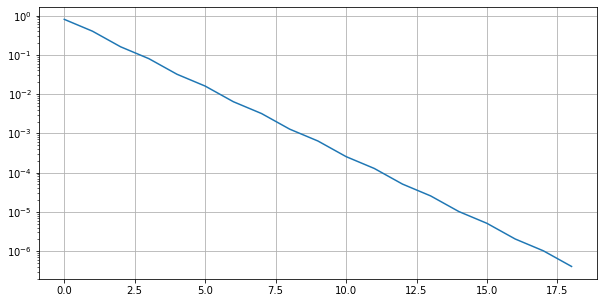

In [27]:
print("Iterations:", len(rs))
print("Error:", np.linalg.norm(x_ex - x_it))

fig, ax = plt.subplots(figsize = (10, 5))
ax.semilogy(rs)
ax.grid(True)

In [28]:
x_ex

array([-1.25,  0.5 ])

In [29]:
x_it

array([-1.25000013,  0.49999995])